In [173]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math


def clip(i):
    return np.clip(i, 0, 1)

def show(A): 
    plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB) * 255)

Reading images
[[0.90196078 0.90588235 0.90196078 ... 0.90196078 0.89411765 0.89019608]
 [0.89411765 0.89411765 0.89411765 ... 0.90588235 0.90588235 0.90588235]
 [0.89019608 0.89019608 0.88235294 ... 0.90196078 0.90196078 0.89411765]
 ...
 [0.21960784 0.24313725 0.21568627 ... 0.52156863 0.45098039 0.43529412]
 [0.21176471 0.19607843 0.18431373 ... 0.59607843 0.50588235 0.49411765]
 [0.14901961 0.10588235 0.13333333 ... 0.63137255 0.55686275 0.54901961]]


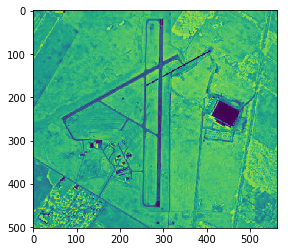

In [656]:
print('Reading images')

s = cv2.imread('strawberries-binary.pbm', cv2.IMREAD_GRAYSCALE)/255
strs = cv2.imread('strawberries.tiff')/255
b = cv2.imread('building.tiff', cv2.IMREAD_GRAYSCALE)/255
m = cv2.imread('marion_airport.tiff', cv2.IMREAD_GRAYSCALE)
print(b)
plt.imshow(m * 255)


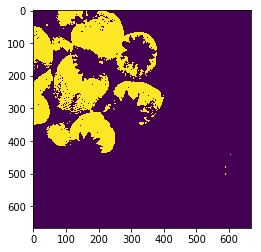

In [61]:
kernel = np.ones((3,3),np.uint8)
# kernel = np.array([[1,1,1], [1,1,1], [1,1,1]])

dilate = cv2.dilate(s, kernel, iterations=1)

plt.imshow(d * 255)

True

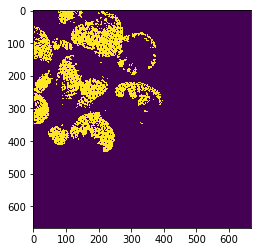

In [654]:
def erode(A, k):
    return cv2.erode(s, k, iterations=1)


def dilate(A, k):
    return cv2.dilate(s, k, iterations=1)


def close(A, k):
    return cv2.morphologyEx(A, cv2.MORPH_CLOSE, k)


def open(A, k):
    return cv2.morphologyEx(A, cv2.MORPH_OPEN, k)

kernel3 = np.ones((3,3),np.uint8)
kernel1 = np.ones((1,1),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
erosion = cv2.dilate(cv2.erode(s, kernel, iterations=1), kernel, iterations=1)
c = cv2.morphologyEx(s, cv2.MORPH_CLOSE, kernel)
closeopen = cv2.morphologyEx(c, cv2.MORPH_OPEN, kernel)
closeopendilate = cv2.dilate(closeopen, kernel, iterations=1)
# dilateclose = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)
o = dilate(s, kernel3)
d = close(o, kernel3)
e = erode(s, kernel3)
# d = dilate(erode(e, kernel3), kernel3)
oppen = open(s, kernel3)

plt.imshow(oppen * 255)
cv2.imwrite('nopixelstrawberry.jpg',  oppen * 255)


In [327]:
def zerocrossing(A):
    (y, x) = A.shape
    newA = np.zeros([y, x, 3],dtype=np.float32)
    A = clip(np.pad(A, 1, 'edge'))
    for i in range(1, x - 10):
        for j in range(1, y - 10):
            val = A[(j, i)]
            lef = A[(j - 1, i)]
            top = A[(j, i - 1)]
            less = (val < 0) and (lef < 0) and (top < 0)
            greater = val > 0 and lef > 0 and top > 0
            zero = val == 0 and lef == 0 and top == 0
            if less or greater or zero:
                newA[(j, i )] = (0, 0, 0)
            else:
                newA[(j, i )] = (0, 0, 1)
    return newA
        

In [715]:
def blurit(A, i):
    return cv2.GaussianBlur(A,(i, i),0)

blr51 = blurit(b, 51)
blr101 = blurit(b, 101)
blr151 = blurit(b, 151)
blr201 = blurit(b, 201)
blr301 = blurit(b, 301)


# blr = blurit(blurit(blurit(blurit(blurit(b, 11), 51), 111), 151), 201)

cv2.imwrite('blurredhouse51.jpg',  blr51 * 255)
cv2.imwrite('blurredhouse101.jpg',  blr101 * 255)
cv2.imwrite('blurredhouse151.jpg',  blr151 * 255)
cv2.imwrite('blurredhouse201.jpg',  blr201 * 255)
cv2.imwrite('blurredhouse301.jpg',  blr301 * 255)
# for i in range(0, 9):
#     img = (cv2.GaussianBlur(img, (i*11,i*11), 0))




True

True

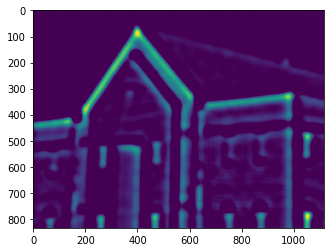

In [718]:
laplace51 = cv2.Laplacian(blr51, cv2.CV_64F)
plt.imsave("laplace51.jpg", clip(laplace51 + 0.5)*255, cmap=plt.cm.gray)
laplace101 = cv2.Laplacian(blr101, cv2.CV_64F)
plt.imsave("laplace101.jpg", clip(laplace101 + 0.5)*255, cmap=plt.cm.gray)
laplace151 = cv2.Laplacian(blr151, cv2.CV_64F)
plt.imsave("laplace151.jpg", clip(laplace151 + 0.5)*255, cmap=plt.cm.gray)
laplace201 = cv2.Laplacian(blr201, cv2.CV_64F)
plt.imsave("laplace201.jpg", clip(laplace201 + 0.5)*255, cmap=plt.cm.gray)
laplace301 = cv2.Laplacian(blr201, cv2.CV_64F)
plt.imsave("laplace301.jpg", clip(laplace201 + 0.5)*255, cmap=plt.cm.gray)
zerocross51 = (zerocrossing(laplace51))
zerocross101 = (zerocrossing(laplace101))
zerocross151 = (zerocrossing(laplace151))
zerocross201 = (zerocrossing(laplace201))
zerocross301 = (zerocrossing(laplace301))

for j in range(0, zerocross.shape[0]):
    for i in range(0, zerocross.shape[1]):
        (r, g, bl) = zerocross51[(j, i)]
        if r == 0 and g == 0 and bl == 0:
            zerocross51[j][i] = b[j][i]
            
for j in range(0, zerocross.shape[0]):
    for i in range(0, zerocross.shape[1]):
        (r, g, bl) = zerocross101[(j, i)]
        if r == 0 and g == 0 and bl == 0:
            zerocross101[j][i] = b[j][i]
            
for j in range(0, zerocross.shape[0]):
    for i in range(0, zerocross151.shape[1]):
        (r, g, bl) = zerocross151[(j, i)]
        if r == 0 and g == 0 and bl == 0:
            zerocross151[j][i] = b[j][i]
            
for j in range(0, zerocross.shape[0]):
    for i in range(0, zerocross.shape[1]):
        (r, g, bl) = zerocross201[(j, i)]
        if r == 0 and g == 0 and bl == 0:
            zerocross201[j][i] = b[j][i]
            
for j in range(0, zerocross.shape[0]):
    for i in range(0, zerocross.shape[1]):
        (r, g, bl) = zerocross301[(j, i)]
        if r == 0 and g == 0 and bl == 0:
            zerocross301[j][i] = b[j][i]
    
plt.imshow(clip(laplace) * 255)
cv2.imwrite('zerocross51.jpg',  zerocross51 * 255)
cv2.imwrite('zerocross101.jpg',  zerocross101 * 255)
cv2.imwrite('zerocross151.jpg',  zerocross151 * 255)
cv2.imwrite('zerocross201.jpg',  zerocross201 * 255)
cv2.imwrite('zerocross301.jpg',  zerocross301 * 255)

# cv2.imwrite('zc.jpg',  laplace * 255)

True

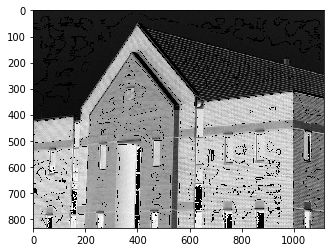

In [705]:

plt.imshow(zerocross * 255)
for j in range(0, zerocross.shape[0]):
    for i in range(0, zerocross.shape[1]):
        (r, g, bl) = zerocross[(j, i)]
        if r == 0 and g == 0 and bl == 0:
            zerocross[j][i] = b[j][i] 
plt.imshow(zerocross * 255)


cv2.imwrite('zerocross.jpg',  zerocross * 255)

In [402]:
# np.add(zerocross[10][5], 5)
# zerocross[10][5] = 0.823
# print(zerocross[10][5][1])

0.0

(666, 666)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


True

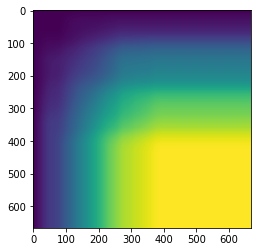

In [433]:
print(s.shape)
(v, ss) = cv2.threshold(s,0.5,1,cv2.THRESH_BINARY)
npss = np.array(ss)
print (npss)
def iifs(img):
    (w, h) = img.shape
    dp = np.zeros([w, h], dtype=np.int64)
    A = img
    for i in (range(w)):
        for j in range(h):
            if i == 0 and j == 0:
                dp[i][j] = A[i][j]
            elif i == 0:
                dp[i][j] = dp[i][j-1] + A[i][j]
            elif j == 0:
                dp[i][j] = dp[i-1][j] + A[i][j]
            else:
                dp[i][j] = dp[i-1][j] + A[i][j] + (dp[i][j - 1] - dp[i-1][j-1])
                
    return dp

ifsres = iifs(npss)
plt.imshow((ifsres / np.max(ifsres)) * 255)

cv2.imwrite('dpimage.jpg',  255*(ifsres / np.max(ifsres)))



In [422]:
def iif(dp):
    (w, h) = dp.shape
    maxv = 0
    maxc = (0, 0)
    for i in range(1, (w - 101)):
        for j in range(1, (h - 101)):
            br = dp[i + 99][j + 99]
            bl = dp[i + 99][j - 1]
            tr = dp[i - 1][j + 99]
            tl = dp[i - 1][j - 1]
            tot = br - bl - tr + tl
            if tot > 0:
                if tot > maxv:
                  maxv = tot
                  maxc = (i, j)
                if tot == maxv:
                  print(maxv, i, j)
            
    return (maxv, maxc)
bestarea = iif(ifsres)
print (bestarea)


2571 1 1
2595 1 2
2609 1 3
2624 1 4
2631 1 5
2636 1 6
2644 1 7
2658 1 8
2675 1 9
2687 1 10
2692 1 11
2704 1 12
2721 1 13
2724 1 14
2730 1 15
2739 1 16
2754 1 17
2775 1 18
2793 1 19
2815 1 20
2845 1 21
2873 1 22
2894 1 23
2923 1 24
2947 1 25
2967 1 26
2980 1 27
3001 1 28
3023 1 29
3048 1 30
3073 1 31
3101 1 32
3134 1 33
3166 1 34
3192 1 35
3210 1 36
3226 1 37
3249 1 38
3274 1 39
3304 1 40
3345 1 41
3381 1 42
3425 1 43
3469 1 44
3512 1 45
3563 1 46
3617 1 47
3666 1 48
3725 1 49
3775 1 50
3825 1 51
3880 1 52
3931 1 53
3984 1 54
4037 1 55
4080 1 56
4127 1 57
4170 1 58
4218 1 59
4274 1 60
4330 1 61
4385 1 62
4446 1 63
4502 1 64
4559 1 65
4609 1 66
4653 1 67
4696 1 68
4739 1 69
4779 1 70
4818 1 71
4856 1 72
4899 1 73
4937 1 74
4960 1 75
4990 1 76
5026 1 77
5070 1 78
5114 1 79
5144 1 80
5171 1 81
5201 1 82
5223 1 83
5237 1 84
5248 1 85
5256 1 91
5258 1 92
5265 1 93
5277 1 94
5289 1 95
5297 1 96
5306 1 97
5319 1 98
5325 1 99
5329 1 100
5341 1 101
5362 1 102
5387 1 103
5404 1 104
5427 1 105
544

True

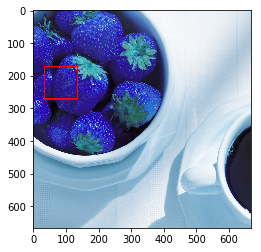

In [434]:
square = cv2.rectangle(strs, (35, 172), (135, 272), (1, 0, 0), 4)

plt.imshow(square)

cv2.imwrite('mostred.jpg',  255*square)

True

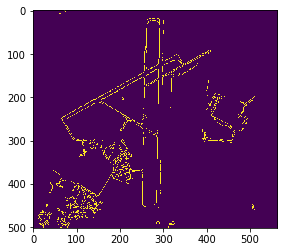

In [590]:

edges = cv2.Canny(m,570, 200, apertureSize = 3)

plt.imshow(edges)
cv2.imwrite('mairport.jpg', edges)
cv2.imwrite('mairport175x575.jpg', cv2.Canny(m,175,575))
cv2.imwrite('mairport175x700.jpg', cv2.Canny(m,175,700))
cv2.imwrite('mairport100x575.jpg', cv2.Canny(m,100,575))
cv2.imwrite('mairport225x400.jpg', cv2.Canny(m,225,400))

True

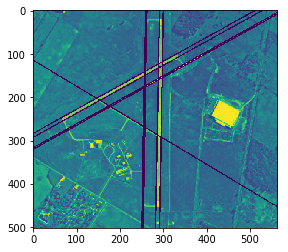

In [728]:
e = edges
img = np.array(m, copy=True)
lines = cv2.HoughLines(e, 1,np.pi/180,110)
for l in lines:
    (rho,theta) = l[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img)
cv2.imwrite('hmairport110.jpg', img)